<a href="https://colab.research.google.com/github/bala-24g/Diabetes_prediction_model/blob/main/Diabetes_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Biostats/diabetes_data_upload.csv')

In [ ]:
df['Gender'] = df['Gender'].apply(str)
df['class'].value_counts(), df['Gender'].value_counts()

(class
 Positive    320
 Negative    200
 Name: count, dtype: int64,
 Gender
 Male      328
 Female    192
 Name: count, dtype: int64)

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Polyuria'] = df['Polyuria'].map({'Yes': 1, 'No': 0})
df['Polydipsia'] = df['Polydipsia'].map({'Yes': 1, 'No': 0})
df['sudden weight loss'] = df['sudden weight loss'].map({'Yes': 1, 'No': 0})
df['weakness'] = df['weakness'].map({'Yes': 1, 'No': 0})
df['Polyphagia'] = df['Polyphagia'].map({'Yes': 1, 'No': 0})
df['Genital thrush'] = df['Genital thrush'].map({'Yes': 1, 'No': 0})
df['visual blurring'] = df['visual blurring'].map({'Yes': 1, 'No': 0})
df['Itching'] = df['Itching'].map({'Yes': 1, 'No': 0})
df['Irritability'] = df['Irritability'].map({'Yes': 1, 'No': 0})
df['delayed healing'] = df['delayed healing'].map({'Yes': 1, 'No': 0})
df['partial paresis'] = df['partial paresis'].map({'Yes': 1, 'No': 0})
df['muscle stiffness'] = df['muscle stiffness'].map({'Yes': 1, 'No': 0})
df['Alopecia'] = df['Alopecia'].map({'Yes': 1, 'No': 0})
df['Obesity'] = df['Obesity'].map({'Yes': 1, 'No': 0})
df['class'] = df['class'].map({'Positive': 1, 'Negative': 0})

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Polydipsia','Polyuria','Gender','Age','partial paresis','sudden weight loss','Alopecia','Irritability']]
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creating Random Forest Model

rf = RandomForestClassifier(n_estimators=100, random_state=69, class_weight={0:1.5,1:1})
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1.5, 1: 1}, random_state=69)

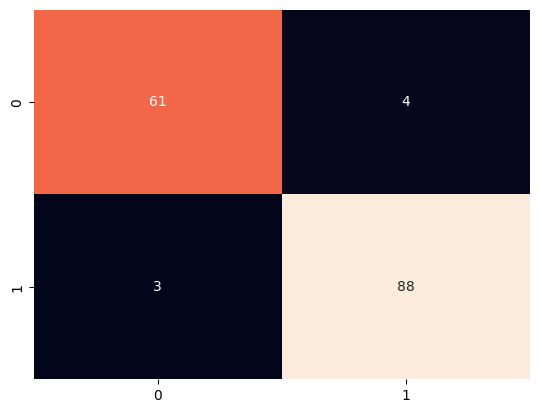

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cbar=False, annot=True)
plt.show()

In [ ]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        65
           1       0.96      0.97      0.96        91

    accuracy                           0.96       156
   macro avg       0.95      0.95      0.95       156
weighted avg       0.96      0.96      0.96       156



Feature ranking for Random Forest Classifier:
1: Polydipsia, Importance 0.24620461853565467
2: Polyuria, Importance 0.21510634556661487
3: Age, Importance 0.17452194814669997
4: Gender, Importance 0.1192020150615197
5: partial paresis, Importance 0.08003130198459069
6: sudden weight loss, Importance 0.057852362985055784
7: Irritability, Importance 0.05576609520020049
8: Alopecia, Importance 0.05131531251966387


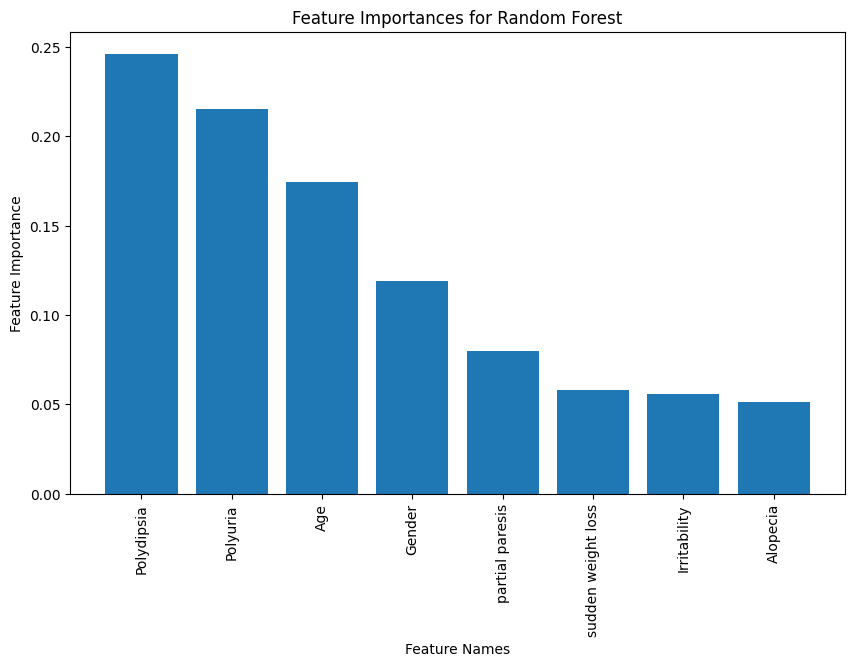

In [ ]:
#'rf_classifier' is the Random Forest model you've trained
# and 'X_train' is your training data with feature names as columns

rf_feature_importances = rf.feature_importances_
feature_names = X_train.columns  # Extract feature names from the DataFrame
sorted_idx = rf_feature_importances.argsort()[::-1]

# Printing feature ranking with names
print("Feature ranking for Random Forest Classifier:")
for i, index in enumerate(sorted_idx):
    print(f"{i + 1}: {feature_names[index]}, Importance {rf_feature_importances[index]}")

# Plotting feature importance with names
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_feature_importances)), rf_feature_importances[sorted_idx], align="center")
plt.xticks(range(len(rf_feature_importances)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importances for Random Forest')
plt.show()


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_classifier.fit(X_train, y_train)
et_pred = et_classifier.predict(X_test)


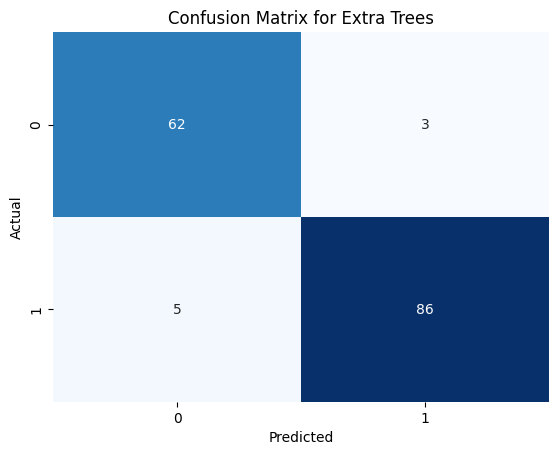

Extra Trees Classifier Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        65
           1       0.97      0.95      0.96        91

    accuracy                           0.95       156
   macro avg       0.95      0.95      0.95       156
weighted avg       0.95      0.95      0.95       156

Accuracy Score: 0.9487179487179487


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
et_cm = confusion_matrix(y_test, et_pred)
sns.heatmap(et_cm, cbar=False, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Extra Trees')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluation Metrics
print("Extra Trees Classifier Report:\n", classification_report(y_test, et_pred))
print("Accuracy Score:", accuracy_score(y_test, et_pred))


Feature ranking for ET Classifier:
1: Polyuria, Importance 0.23156803995701178
2: Polydipsia, Importance 0.22516186780782893
3: Age, Importance 0.15946736122572325
4: Gender, Importance 0.1534595963084331
5: partial paresis, Importance 0.06932441735858272
6: Irritability, Importance 0.057405911244948996
7: Alopecia, Importance 0.05212491247446654
8: sudden weight loss, Importance 0.05148789362300485


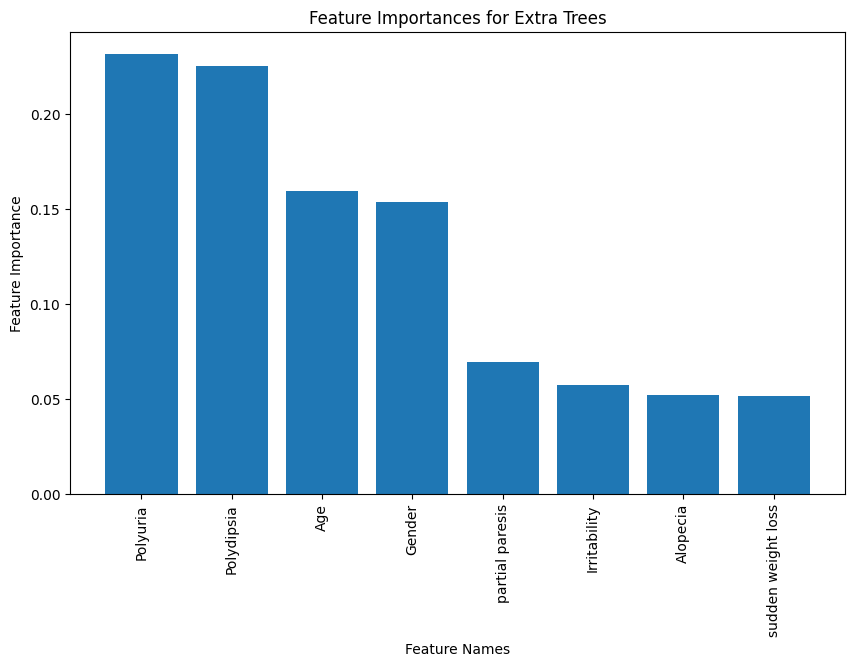

In [ ]:
# Feature Importance
et_feature_importances = et_classifier.feature_importances_
feature_names = X_train.columns  # Assuming X_train is a DataFrame with feature names
sorted_idx = et_feature_importances.argsort()[::-1]

# Printing feature ranking
print("Feature ranking for ET Classifier:")
for i, index in enumerate(sorted_idx):
    print(f"{i + 1}: {feature_names[index]}, Importance {et_feature_importances[index]}")

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(et_feature_importances)), et_feature_importances[sorted_idx], align="center")
plt.xticks(range(len(et_feature_importances)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importances for Extra Trees')
plt.show()


In [ ]:
from sklearn.svm import SVC

svc_classifier = SVC(probability=True, random_state=42)
svc_classifier.fit(X_train, y_train)
svc_pred = svc_classifier.predict(X_test)


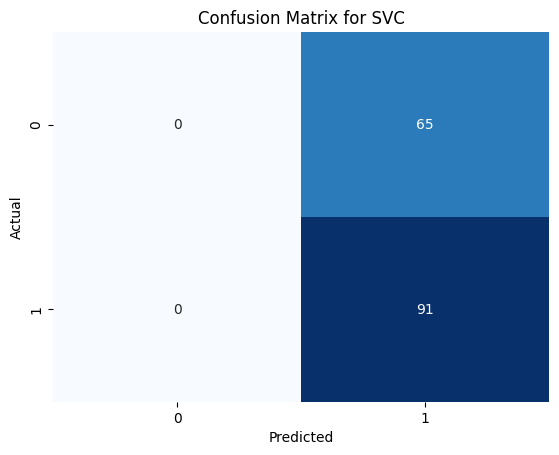

SVC Classifier Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.58      1.00      0.74        91

    accuracy                           0.58       156
   macro avg       0.29      0.50      0.37       156
weighted avg       0.34      0.58      0.43       156

Accuracy Score: 0.5833333333333334


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
svc_cm = confusion_matrix(y_test, svc_pred)
sns.heatmap(svc_cm, cbar=False, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluation Metrics
print("SVC Classifier Report:\n", classification_report(y_test, svc_pred))
print("Accuracy Score:", accuracy_score(y_test, svc_pred))


In [ ]:
from lightgbm import LGBMClassifier

lgbm_classifier = LGBMClassifier(random_state=42)
lgbm_classifier.fit(X_train, y_train)
lgbm_pred = lgbm_classifier.predict(X_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 229, number of negative: 135
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 58
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.629121 -> initscore=0.528447
[LightGBM] [Info] Start training from score 0.528447
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

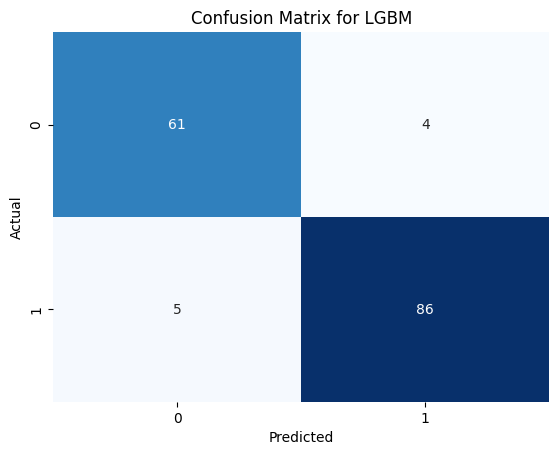

LGBM Classifier Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        65
           1       0.96      0.95      0.95        91

    accuracy                           0.94       156
   macro avg       0.94      0.94      0.94       156
weighted avg       0.94      0.94      0.94       156

Accuracy Score: 0.9423076923076923


In [ ]:
# Confusion Matrix
lgbm_cm = confusion_matrix(y_test, lgbm_pred)
sns.heatmap(lgbm_cm, cbar=False, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for LGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluation Metrics
print("LGBM Classifier Report:\n", classification_report(y_test, lgbm_pred))
print("Accuracy Score:", accuracy_score(y_test, lgbm_pred))


Feature ranking for LGBM Classifier:
1: Age, Importance 764
2: Polyuria, Importance 125
3: Alopecia, Importance 109
4: Gender, Importance 102
5: Irritability, Importance 86
6: Polydipsia, Importance 75
7: sudden weight loss, Importance 65
8: partial paresis, Importance 65


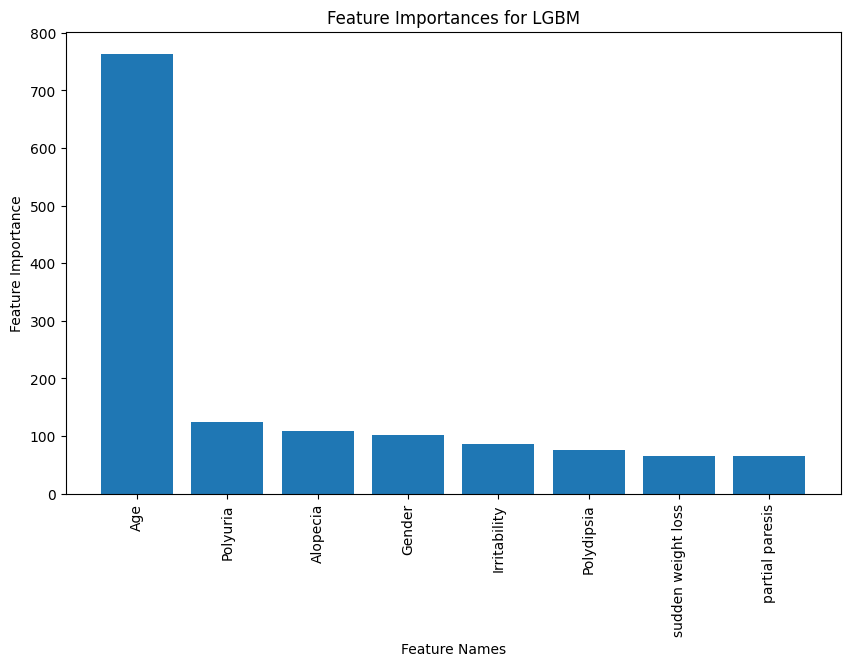

In [ ]:
# Feature Importance
lgbm_feature_importances = lgbm_classifier.feature_importances_
feature_names = X_train.columns  # Assuming X_train is a DataFrame with feature names
sorted_idx = lgbm_feature_importances.argsort()[::-1]

# Printing feature ranking
print("Feature ranking for LGBM Classifier:")
for i, index in enumerate(sorted_idx):
    print(f"{i + 1}: {feature_names[index]}, Importance {lgbm_feature_importances[index]}")

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(lgbm_feature_importances)), lgbm_feature_importances[sorted_idx], align="center")
plt.xticks(range(len(lgbm_feature_importances)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importances for LGBM')
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_classifier = GradientBoostingClassifier(random_state=42)
gbc_classifier.fit(X_train, y_train)
gbc_pred = gbc_classifier.predict(X_test)


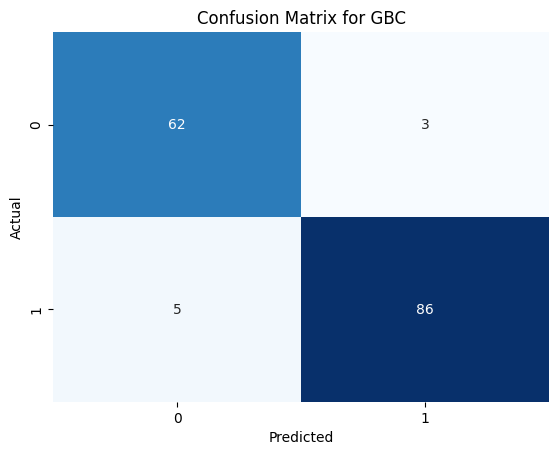

GBC Classifier Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        65
           1       0.97      0.95      0.96        91

    accuracy                           0.95       156
   macro avg       0.95      0.95      0.95       156
weighted avg       0.95      0.95      0.95       156

Accuracy Score: 0.9487179487179487


In [ ]:
# Confusion Matrix
gbc_cm = confusion_matrix(y_test, gbc_pred)
sns.heatmap(gbc_cm, cbar=False, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for GBC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluation Metrics
print("GBC Classifier Report:\n", classification_report(y_test, gbc_pred))
print("Accuracy Score:", accuracy_score(y_test, gbc_pred))


Feature ranking for GBC Classifier:
1: Polydipsia, Importance 0.45552326265309473
2: Polyuria, Importance 0.18303583557917746
3: Gender, Importance 0.14158375299295756
4: Age, Importance 0.10693418923838828
5: Alopecia, Importance 0.03586961098843352
6: Irritability, Importance 0.03479775206373129
7: sudden weight loss, Importance 0.026846953798025805
8: partial paresis, Importance 0.015408642686191437


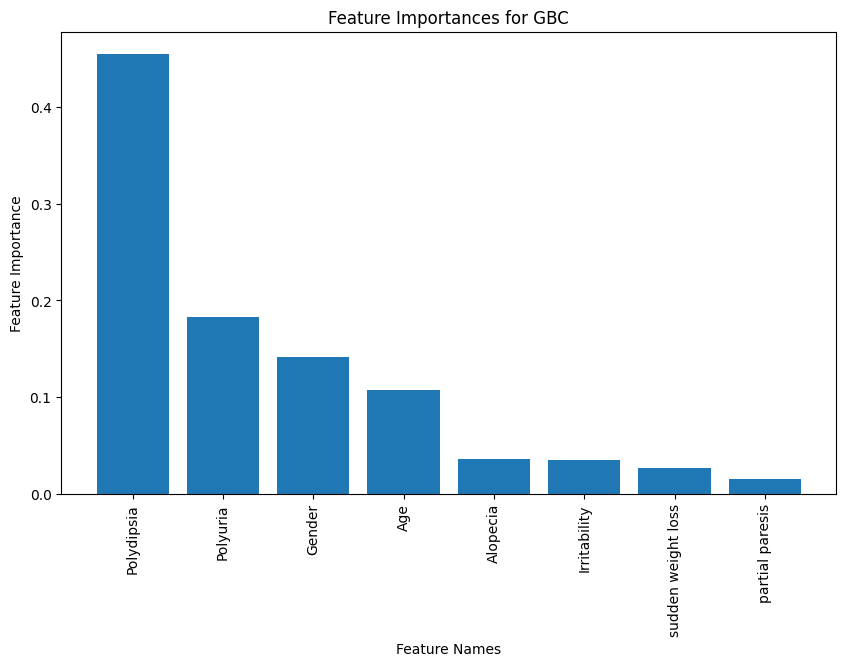

In [ ]:
# Feature Importance
gbc_feature_importances = gbc_classifier.feature_importances_
feature_names = X_train.columns  # Assuming X_train is a DataFrame with feature names
sorted_idx = gbc_feature_importances.argsort()[::-1]

# Printing feature ranking
print("Feature ranking for GBC Classifier:")
for i, index in enumerate(sorted_idx):
    print(f"{i + 1}: {feature_names[index]}, Importance {gbc_feature_importances[index]}")

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(gbc_feature_importances)), gbc_feature_importances[sorted_idx], align="center")
plt.xticks(range(len(gbc_feature_importances)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importances for GBC')
plt.show()
